# Data

Observed inflorescences each day

In [1]:
v = [142, 181, 219, 258, 297, 336, 374, 413, 428, 443, 458, 474, 489, 504, 519, 542, 564, 587, 610, 633, 655, 678, 655, 632, 610, 587, 564, 542, 519, 496, 770, 1044, 1033, 1023, 1012, 1002, 991, 947, 903, 1154, 1404, 1655, 1906, 2199, 2492, 2785, 2921, 3056, 3192, 3327, 3463, 4044, 4626, 4901, 5176, 5450, 5725, 6000, 5547, 5094, 5143, 5192, 5242, 5291, 5340, 4886, 4431, 4589, 4746, 4904, 5062, 4563, 4063, 3564, 3291, 3018, 2745, 2472, 2170, 1869, 1567]

In [2]:
def plot_data():
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    ax.plot(v,label='observed', linewidth=3)
    ax.set_ylabel('population')
    ax.legend()

    plt.show()

In [3]:
import numpy as np
import scipy

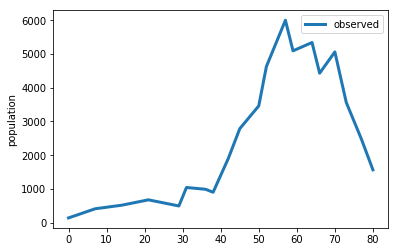

In [5]:
plot_data()

# First model

We consider that the population of inflorescences follows a dynamic modelled with the following equation

$I_t = J_t + \sum^{50}_{j=1}J_{t-j}\prod(1-\alpha_{t-j})$

In [6]:
def estimate(J, alpha):
    I = list(J)
    for i, ival in enumerate(J) :
        for j in range(i-1,max(0,i-50),-1):
            oi = J[j]
            for d in range(j+mindeathdelay,i+1):
                oi *= (1-alpha[d])
            I[i] += oi
    return I

# Second model

We consider that the population of inflorescences follows a dynamic modelled with the following equation

$I_t = J_t + \sum^{50}_{j=1}J_{t-j} \times (1-F(\mu=29,\sigma=14,t-j))$

Plutôt 
$$I_t = J_t + \sum^{50}_{j=1}J_{t-j} \times (1-F_{\mathcal{N}(\mu=29, \sigma=14)}(50-j)) $$

In [7]:
from scipy.stats import norm

ncdf = [norm.cdf(i,loc = 29, scale = 14) for i in range(50)]

def estimate(J):
    I = list(J)
    for i, ival in enumerate(J) :
        for j in range(i-1,max(0,i-50),-1):
            oi = J[j] * (1 - ncdf[i-j])
            I[i] += oi
    return I

# Optimisation

In [8]:
def opt(args):
    J = args
    I = estimate(J)
    I = np.array(I)
    dI = pow(I - v,2)
    return sum(dI) 


def find_parameters():
    from scipy.optimize import minimize
    
    J = [1 for i in v]

    res = minimize(opt, J, bounds = [(0,np.inf) for i in v])
    print(list(res.x))
    return list(res.x)


# Plotting

In [9]:
def estimate_death(J):
    I  = estimate(J)
    return [(I[i-1] if i >0 else J[i]) + J[i] -vi for i,vi in enumerate(I)]

def plot_estimate(args):
    import matplotlib.pyplot as plt
    J = args
    I = estimate(J)
    D = estimate_death(J)
    fig, ax = plt.subplots()
    ax.plot(v,label='observed', linewidth=3)
    ax.plot(I,label='simulated')
    ax.plot(J,label='sim. burst')
    #ax.plot(D2,label='sim. dead', color='b', linewidth=3)
    #ax.plot(D,label='sim. dead', color='r')
    #ax.plot(np.cumsum(J),label='sim. cum burst')
    #ax.plot(np.cumsum(D),label='sim. cum dead')
    #ax.plot(B, label = "burst observed")
    ax.set_ylabel('population')
    ax.legend()

    plt.show()

# Execution

In [9]:
optarg = find_parameters()
#print opt(optarg)


[141.83717501701216, 186.61685966043842, 43.397502231256574, 42.01654636155535, 42.1201112558702, 42.58352614250776, 38.157933381409, 15.608214805010894, 43.152432150205094, 46.518566317098276, 12.279057242782091, 11.445006898901402, 11.390289658545036, 7.803458488046853, 6.791295955373263, 51.07308670550522, 53.43826558955274, 11.544196996076769, 8.19299059427569, 5.128895018051598, 1.7572648734573757, 48.942884094662745, 7.45342005714845, 6.815286122096723, 0.0, 0.0, 0.0, 1.400032466838964, 6.766560235302725, 9.664361981235738, 306.77549358516495, 237.35631939295024, 14.84682427345264, 12.518053323539883, 12.618406562870687, 12.390872429223666, 0.0, 0.0, 0.0, 260.3787782694996, 284.14846304108045, 287.26840981956394, 289.2455374104506, 332.90505271282586, 336.0809211761108, 338.56388344803463, 184.33501067813043, 181.97243086900983, 185.76091640638427, 186.99640075150566, 191.04720847637248, 651.20222863993, 654.591725760881, 352.3153258480071, 351.04077403236084, 354.1827494395522, 

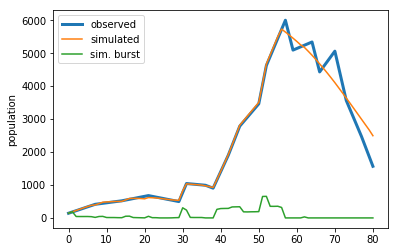

In [12]:
plot_estimate(optarg)


In [10]:
import pandas as pd
import numpy as np
inflos_ER = np.array(pd.read_csv("inflos_corrigees.csv").inflos_ER)
inflos_PS = np.array(pd.read_csv("inflos_corrigees.csv").inflos_PS)
inflos_EH = np.array(pd.read_csv("inflos_corrigees.csv").inflos_EH)
burst_ER = np.array(pd.read_csv("burst.csv").burstER)
burst_PS = np.array(pd.read_csv("burst.csv").burstPS)
burst_EH = np.array(pd.read_csv("burst.csv").burstEH)
inflosER = np.array(pd.read_csv("r1.csv").inflos_vivantes)
inflosPS = np.array(pd.read_csv("b1.csv").inflos_vivantes)
inflosEH = np.array(pd.read_csv("h1.csv").inflos_vivantes)

[350.0134343452573, 453.0494680425028, 111.41292783253148, 105.4176075524184, 106.14146989801527, 106.88419984201273, 107.92798314266074, 27.862121398660715, 26.76922996155252, 25.358363282095244, 25.54519926027305, 26.41473950792908, 27.007805792169464, 28.189144320188845, 122.8007618803285, 128.3152149460844, 101.53006793971205, 102.33544605578878, 104.74898408664677, 102.96824259332047, 121.16128750960435, 134.7787425587716, 137.86280269690303, 137.01578907675332, 139.7596137548663, 142.57200716958042, 145.70417381412688, 154.58366499420154, 37.24443126919395, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 46.82048999967827, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 89.78342873052377, 144.49181086038928, 135.12353798107915, 132.69392868814563, 131.2803785071253, 129.6511363926496, 127.96846943359883, 79.59601412352224, 76.77659518316676, 6.2627699110336845, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.67835733741944, 36.910199285431624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

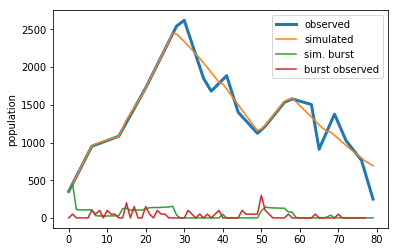

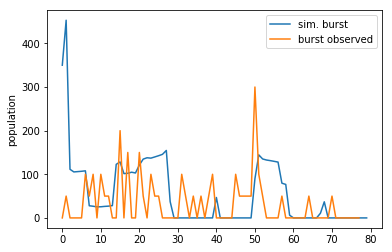

In [61]:
v = inflosER
B = burst_ER * 50
opt_args_ER = find_parameters()
plot_estimate(opt_args_ER)
plot_estimate_burst(opt_args_ER)

[231.35134498309577, 263.1403688655092, 35.519398739122536, 31.215276884534056, 31.79127788960595, 31.583174941078404, 27.640386994722814, 14.635660924044249, 14.993744364076822, 6.1507722412770045, 5.63795948726839, 0.7257925024988745, 0.0, 0.0, 75.4595353180211, 82.00232081716146, 17.8869887330277, 22.031034975909087, 22.79195886181951, 10.221408347499747, 57.75228834845634, 7.847338390478435, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.390700893578728, 10.609708410549484, 0.0, 19.363579198503697, 39.87554903766926, 40.48034835461954, 21.077981753081588, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.623219674981039, 120.08536501224773, 122.45307526157539, 116.3976867246767, 116.15027405087227, 116.60636777369129, 116.8083064709301, 116.82490644302892, 533.106536317362, 560.4567648461133, 140.00994342817992, 132.54929197450312, 133.98619823729632, 133.91811097302968, 73.78742001818966, 0.0, 0.0, 51.87075831583061, 54.81638852567342, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 106.45969010628332, 148.99610796959686, 0.

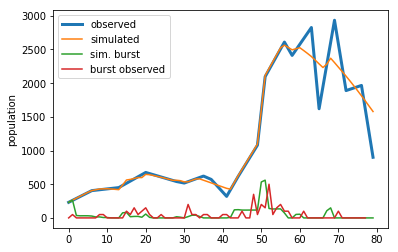

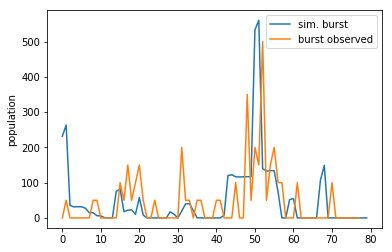

In [62]:
v = inflosPS
B = burst_PS * 50
opt_args_PS = find_parameters()
plot_estimate(opt_args_PS)
plot_estimate_burst(opt_args_PS)

[180.25526992154695, 226.4936275997441, 45.307288331510335, 41.830591828513484, 42.459873262367445, 41.513904182456194, 16.444664672369008, 48.81911577305092, 51.78093673625543, 23.632431806994763, 22.215401686226823, 21.092401323262774, 19.75710680770917, 18.939874846341613, 57.85483855055529, 61.264141439995974, 18.558375145392965, 15.228234310169707, 12.339015543243248, 10.107907329043584, 56.57018423922785, 69.7204379136405, 73.39554865212266, 60.48088882226898, 62.52913543682146, 65.04068749631428, 67.8495593231891, 72.64188499930185, 54.048468319005345, 0.0, 0.0, 0.0, 0.0, 13.74297566369447, 18.78743554547672, 8.201569977850445, 0.0, 0.0, 272.0025461613084, 291.05531639789984, 293.04305813638183, 295.13692413595504, 339.0804362944493, 342.20498733445817, 344.48633781059795, 189.67182503217072, 188.37403396318862, 190.65850372114684, 192.83008224721402, 195.24765293695233, 643.2649930205931, 671.037358038544, 356.2633431972951, 353.73502886675954, 358.28397128334166, 356.009337291

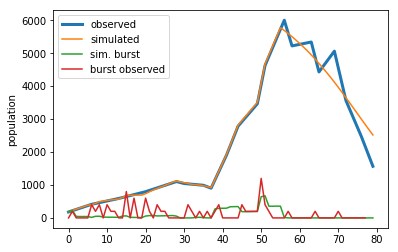

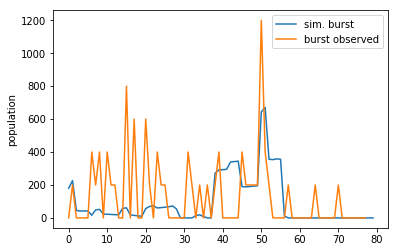

In [64]:
v = inflosEH
B = burst_ER * 200
opt_args_EH = find_parameters()
plot_estimate(opt_args_EH)
plot_estimate_burst(opt_args_EH)

In [47]:
print(burst_PS)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [50]:
def plot_estimate_burst(args):
    import matplotlib.pyplot as plt
    J = args
    I = estimate(J)
    D = estimate_death(J)
    fig, ax = plt.subplots()
    #ax.plot(v,label='observed', linewidth=3)
    #ax.plot(I,label='simulated')
    ax.plot(J,label='sim. burst')
    #ax.plot(D2,label='sim. dead', color='b', linewidth=3)
    #ax.plot(D,label='sim. dead', color='r')
    #ax.plot(np.cumsum(J),label='sim. cum burst')
    #ax.plot(np.cumsum(D),label='sim. cum dead')
    ax.plot(B, label = "burst observed")
    ax.set_ylabel('population')
    ax.legend()

    plt.show()

[350.0134343452573, 453.0494680425028, 111.41292783253148, 105.4176075524184, 106.14146989801527, 106.88419984201273, 107.92798314266074, 27.862121398660715, 26.76922996155252, 25.358363282095244, 25.54519926027305, 26.41473950792908, 27.007805792169464, 28.189144320188845, 122.8007618803285, 128.3152149460844, 101.53006793971205, 102.33544605578878, 104.74898408664677, 102.96824259332047, 121.16128750960435, 134.7787425587716, 137.86280269690303, 137.01578907675332, 139.7596137548663, 142.57200716958042, 145.70417381412688, 154.58366499420154, 37.24443126919395, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 46.82048999967827, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 89.78342873052377, 144.49181086038928, 135.12353798107915, 132.69392868814563, 131.2803785071253, 129.6511363926496, 127.96846943359883, 79.59601412352224, 76.77659518316676, 6.2627699110336845, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.67835733741944, 36.910199285431624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

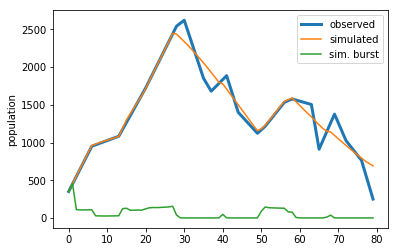

[350.0134343452573,
 453.0494680425028,
 554.155460698015,
 655.1619181943995,
 756.2901485008645,
 857.3345405600837,
 958.4922830855359,
 978.5358535119204,
 998.1639973278855,
 1015.471649907787,
 1031.9895053386335,
 1048.2918592694916,
 1064.010289536864,
 1079.6627141622068,
 1188.593999726279,
 1299.5118893935214,
 1381.6931126665656,
 1463.3314099235968,
 1545.4092716918099,
 1623.6038578464577,
 1717.8918088833996,
 1823.1739262026645,
 1928.8782298202484,
 2031.1874179960873,
 2133.6996247087927,
 2236.341949492591,
 2339.3664622784304,
 2448.4532240452563,
 2437.197615309591,
 2388.4926057982,
 2338.2115488235654,
 2285.7043540190384,
 2231.0497889188646,
 2174.341698477577,
 2115.6886824777093,
 2055.213654959252,
 1993.0532891270568,
 1929.357349954992,
 1864.2879153657673,
 1798.0184856263697,
 1777.553469664931,
 1708.379934251659,
 1639.4560720971178,
 1570.0900064891478,
 1500.4920546353533,
 1430.876129723809,
 1361.4580963009073,
 1292.4540383671274,
 1224.0784554189

In [16]:
v = inflosER
opt_argsER = find_parameters()
plot_estimate(opt_argsER)
estimate(opt_argsER)

[231.35134498309577, 263.1403688655092, 35.519398739122536, 31.215276884534056, 31.79127788960595, 31.583174941078404, 27.640386994722814, 14.635660924044249, 14.993744364076822, 6.1507722412770045, 5.63795948726839, 0.7257925024988745, 0.0, 0.0, 75.4595353180211, 82.00232081716146, 17.8869887330277, 22.031034975909087, 22.79195886181951, 10.221408347499747, 57.75228834845634, 7.847338390478435, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.390700893578728, 10.609708410549484, 0.0, 19.363579198503697, 39.87554903766926, 40.48034835461954, 21.077981753081588, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.623219674981039, 120.08536501224773, 122.45307526157539, 116.3976867246767, 116.15027405087227, 116.60636777369129, 116.8083064709301, 116.82490644302892, 533.106536317362, 560.4567648461133, 140.00994342817992, 132.54929197450312, 133.98619823729632, 133.91811097302968, 73.78742001818966, 0.0, 0.0, 51.87075831583061, 54.81638852567342, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 106.45969010628332, 148.99610796959686, 0.

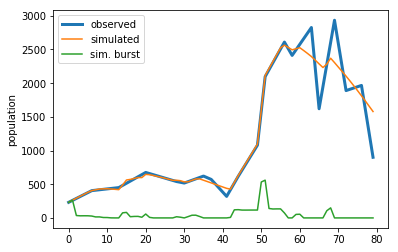

[231.35134498309577,
 263.1403688655092,
 292.67328949204887,
 321.9905909899573,
 351.6737949919439,
 380.8074315836434,
 405.63410949138836,
 417.13701895332633,
 428.85890125782123,
 431.30673161263405,
 432.9835604103839,
 429.3021407116246,
 424.52209481407044,
 419.26739635931585,
 488.96248478041707,
 562.9559691888785,
 571.830971658321,
 585.3714388413742,
 598.8472863724924,
 598.9665652463688,
 646.1124909459029,
 641.5197563431205,
 629.2641076991645,
 616.4179258514815,
 602.8439557391453,
 588.56198570472,
 573.5985258724058,
 557.9867272754734,
 559.1568917119314,
 552.5874365954112,
 534.9790237723361,
 536.4662450304008,
 557.6133745341147,
 578.4705464354471,
 579.4535667668983,
 559.383267293698,
 539.4987280944623,
 519.4605267543479,
 499.33308453563285,
 479.1801523142656,
 459.06417913428436,
 439.0457329461774,
 426.80620185170335,
 527.0664000440825,
 627.3673059152433,
 721.3685653550214,
 815.0308528383815,
 908.9086056820686,
 1002.6825070462253,
 1096.10948

In [17]:
v = inflosPS
opt_argsPS = find_parameters()
plot_estimate(opt_argsPS)
estimate(opt_argsPS)

[180.25526992154695, 226.4936275997441, 45.307288331510335, 41.830591828513484, 42.459873262367445, 41.513904182456194, 16.444664672369008, 48.81911577305092, 51.78093673625543, 23.632431806994763, 22.215401686226823, 21.092401323262774, 19.75710680770917, 18.939874846341613, 57.85483855055529, 61.264141439995974, 18.558375145392965, 15.228234310169707, 12.339015543243248, 10.107907329043584, 56.57018423922785, 69.7204379136405, 73.39554865212266, 60.48088882226898, 62.52913543682146, 65.04068749631428, 67.8495593231891, 72.64188499930185, 54.048468319005345, 0.0, 0.0, 0.0, 0.0, 13.74297566369447, 18.78743554547672, 8.201569977850445, 0.0, 0.0, 272.0025461613084, 291.05531639789984, 293.04305813638183, 295.13692413595504, 339.0804362944493, 342.20498733445817, 344.48633781059795, 189.67182503217072, 188.37403396318862, 190.65850372114684, 192.83008224721402, 195.24765293695233, 643.2649930205931, 671.037358038544, 356.2633431972951, 353.73502886675954, 358.28397128334166, 356.009337291

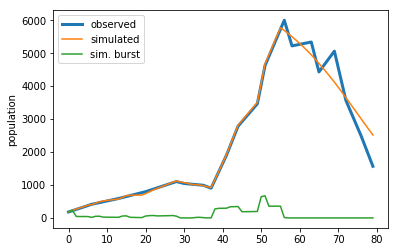

[180.25526992154695,
 226.4936275997441,
 266.6481560179385,
 306.50988427521605,
 346.7538388345295,
 385.68389420309916,
 399.1670957812428,
 445.1537199646189,
 492.9798700856247,
 512.0349776938655,
 529.6904525143298,
 545.6893342682675,
 559.7744733119106,
 572.4306861394538,
 623.3430043880261,
 676.066985773371,
 685.0989630518079,
 690.793890498314,
 692.8175292073289,
 691.8034860862315,
 736.420990188338,
 792.2459655305047,
 850.3631017968391,
 894.3168795807755,
 939.4020920495917,
 985.7664617690509,
 1033.6712070870824,
 1085.068727237865,
 1116.505299849849,
 1093.028963775688,
 1069.5631967964887,
 1045.1077964415997,
 1019.7049285832878,
 1007.1463232791099,
 998.47585122615,
 978.2651325567618,
 949.2912720658276,
 919.8047157521768,
 1161.7245853601148,
 1415.9908170024944,
 1670.2478297115147,
 1924.8292765771482,
 2221.466311529007,
 2518.253612571415,
 2814.950290089946,
 2954.277465071631,
 3093.104157425286,
 3231.926541767932,
 3370.3945751101182,
 3508.576737

In [18]:
v = inflosEH
opt_argsEH = find_parameters()
plot_estimate(opt_argsEH)
estimate(opt_argsEH)

In [19]:
ncdf2 = [norm.cdf(i,loc = 19, scale = 14) for i in range(50)]

def estimate_corrected(J):
    I = list(J)
    for i, ival in enumerate(J) :
        for j in range(i-1,max(0,i-50),-1):
            oi = J[j] * (1 - ncdf2[i-j])
            I[i] += oi
    return I

def plot_estimate_corrected(args):
    import matplotlib.pyplot as plt
    J = args
    I = estimate_corrected(J)
    fig, ax = plt.subplots()
    ax.plot(v,label='observed', linewidth=3)
    ax.plot(I,label='simulated')
    ax.plot(J,label='sim. burst')
    #ax.plot(D2,label='sim. dead', color='b', linewidth=3)
    #ax.plot(D,label='sim. dead', color='r')
    #ax.plot(np.cumsum(J),label='sim. cum burst')
    #ax.plot(np.cumsum(D),label='sim. cum dead')
    #ax.plot(B, label = "burst observed")
    ax.set_ylabel('population')
    ax.legend()

    plt.show()

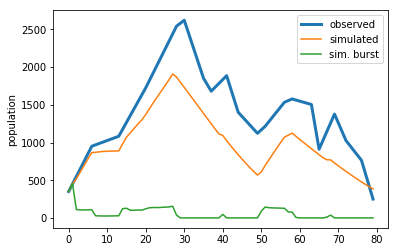

In [20]:
v = inflosER
plot_estimate_corrected(opt_argsER)

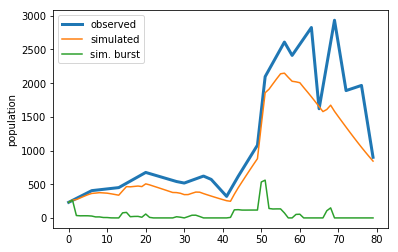

In [21]:
v = inflosPS
plot_estimate_corrected(opt_argsPS)

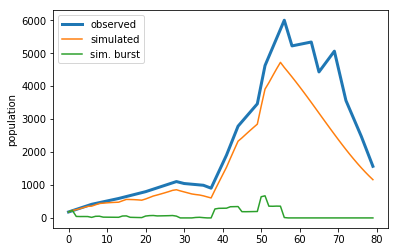

In [22]:
v = inflosEH
plot_estimate_corrected(opt_argsEH)

In [23]:
print(estimate_corrected(opt_argsER))
print(estimate_corrected(opt_argsPS))
print(estimate_corrected(opt_argsEH))

[350.0134343452573, 453.0494680425028, 519.4875423433269, 607.9336785220067, 695.7097594328704, 782.1014750269784, 867.2628666224562, 869.9116126622566, 876.9300579989879, 881.0818350013842, 883.9901931484651, 886.1909747977722, 887.3455616601582, 888.0797526878146, 981.7918810180802, 1070.1416262445478, 1128.4989159956067, 1187.5489458317995, 1246.4733966164217, 1300.911524093673, 1371.234386927714, 1450.9254479708306, 1529.6973074333773, 1604.5022881843463, 1679.287024143572, 1753.7822849395516, 1828.278759753181, 1908.4701430774585, 1867.5418835447704, 1798.0184856263697, 1730.7329796652527, 1662.6246165773518, 1593.8946807948016, 1524.751170378296, 1455.4073296846361, 1386.0800702860085, 1316.9882873864883, 1248.3510829686202, 1180.3859113181566, 1113.3066671827376, 1094.142231352746, 1024.804627187324, 960.9908731128195, 898.7889569012149, 838.3649244712789, 779.8707133903748, 723.4427629088113, 669.2008235338332, 617.246993776468, 567.6650067312078, 610.3032119235694, 695.1466433